# Example calculation of PV potential for ERA5 data

In [15]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# location of era5 data on teachinghub
path="~/LEHRE/msc-intro-comp-met-ex-w2024/data/era5/"

Load data for Jan and Feb 1979.

In [17]:
ds=xr.open_mfdataset([path+"era5-2000-01.nc", path+"era5-1979-02.nc"])

Calculate wind speed.

In [18]:
ds["wspd"] = np.sqrt(np.power(ds["u10"],2)+np.power(ds["v10"],2))

Calculate PV potential following Jerez et al. 2015, https://www.nature.com/articles/ncomms10014.

**Note:** radiative fluxes are accumulated over 1 hour, so we need to divided by seconds per hour to obtain fluxes in Wm-2.

In [12]:
sechour=3600 # secondd per hour
#hi

c1 = 4.3
c2 = 0.943
c3 = 0.028
c4 = -1.528

# cell temperature
T_cell = c1 + c2 * (ds.t2m - 273.15) + c3 * ds.ssrd/sechour + c4 * ds.wspd

# performance ratio
beta = -0.005
p_r = 1 + beta*(T_cell-25)

# pv potential
pv_pot = p_r * ds.ssrd/(sechour) * 1/1000

Calculate time-mean PV potential and plot as a map.

In [13]:
pv_pot_tmean = pv_pot.mean("valid_time").compute()

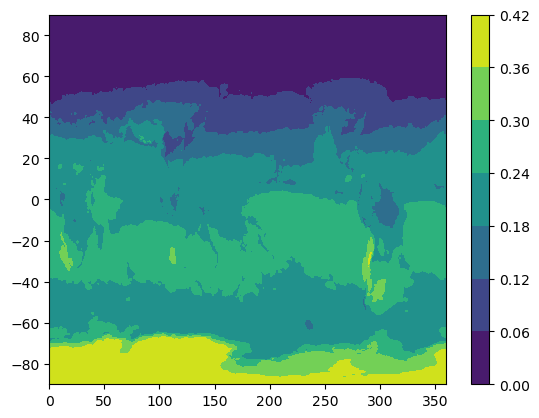

In [14]:
plt.contourf(ds.longitude, ds.latitude, pv_pot_tmean)
plt.colorbar()